### Dynamical system

$$
\begin{cases}
\dot\sigma = \beta (\omega_0 + \omega_1 uk - \omega_2 i_{CB} \lambda^2 - \sigma) \\
\dot k = k (sr - n + \xi_0 - \xi_1 \sigma - \xi_2 i_{CB} \lambda^2) \\
\dot\lambda = \lambda (s i_{CB} \lambda - sr)
\end{cases}
$$

##### Equilibrium:

$$
u^{*} = \displaystyle\frac
{g_0 \alpha_2 s i_{CB} \lambda^2}
{s (1-\alpha_2) (1-\sigma) - \alpha_1}
\quad\quad
r^{*} = (1-\sigma) u^{*}
\quad\quad
g^{*} = s r^{*}
$$

##### Numerical Solution:

$$
X(t+\Delta t) = X(t) + \Delta t \cdot \dot{X}(t) \\ = X(t) + \Delta t \cdot M(t) \cdot X(t)
$$

where

$$
M(t) = 
\begin{bmatrix}
0 & 0 & 0 & 0 \\
\beta\omega_0 & -\beta & \beta \omega_{1} u & - \omega_2 i_{CB} \lambda (t) \\
0 & -\xi_{1} k(t) & sr - n + \xi_0 & - \xi_2 i_{CB} \lambda (t) k (t) \\
0 & 0 & 0 & s(\lambda (t) i_{CB} - r)
\end{bmatrix}
\quad
X(t) = \begin{bmatrix} 1 \\ \sigma (t) \\ k (t) \\ \lambda (t) \end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Setting the simulation parameters:

In [2]:
T = 3000
delta_t = 0.1

In [3]:
list_u, list_r, list_g = [], [], []
list_sigma, list_k, list_lamb = [], [], []
list_sigma_dot, list_k_dot, list_lamb_dot = [], [], []

Setting the system's constants:

In [4]:
omega0, omega1, omega2 = 0.30, 0.01, 0.00005
xi0, xi1, xi2 = 0.0255, 0.05, 0.05
beta, s = 0.001, 0.15
alpha1, alpha2, g0 = 0.0005, 0.40, 0.55

In [5]:
def capacity_utilisation(sigma, iCB, lamb):
    global g0, s
    global alpha1, alpha2
    num = g0*alpha2*s*iCB*lamb**2
    den = s*(1-alpha2)*(1-sigma)-alpha1
    return (num/den)

def profit_rate(sigma, iCB, lamb):
    return (1-sigma) * capacity_utilisation(sigma,iCB,lamb)

def capital_accumulation(sigma, iCB,lamb):
    global s
    return s * profit_rate(sigma,iCB,lamb)

In [6]:
def base_interest():
    return 0.075

def labour_growth_rate():
    return 0.002

Setting the variables' initial values:

In [7]:
sigma = 0.55
k = 0.45
lamb = 0.25
X = np.array([1.0, sigma, k, lamb]).reshape((4,1))

In [8]:
def update_matrix(k, u, r, iCB, n, lamb):
    global beta, s
    global xi0, xi1, xi2
    global omega0, omega1, omega2

    matrix = [0, 0, 0, 0,
              beta*omega0, -beta, beta*omega1*u, -omega2*iCB*lamb,
             0, -xi1*k, s*r-n+xi0, -xi2*iCB*lamb*k,
             0, 0, 0, s*(lamb*iCB - r)]

    return np.array(matrix).reshape((4,4))

##### Loop:

1. Obtain exogeous variables;
2. Calculate equilibrium points;
3. Update the system's variables.

In [9]:
for _ in range(T):
    iCB = base_interest()
    n = labour_growth_rate()

    u_star = capacity_utilisation(X[1,0],iCB,X[3,0])
    r_star = profit_rate(X[1,0],iCB,X[3,0])
    g_star = capital_accumulation(X[1,0],iCB,X[3,0])

    list_u.append(u_star)
    list_r.append(r_star)
    list_g.append(g_star)

    M = update_matrix(X[2,0],u_star,r_star,iCB,n,X[3,0])
    X_dot = M.dot(X)
    X = X + delta_t * X_dot
    
    list_sigma.append(X[1,0])
    list_k.append(X[2,0])
    list_lamb.append(X[3,0])
    list_sigma_dot.append(X_dot[1,0])
    list_k_dot.append(X_dot[2,0])
    list_lamb_dot.append(X_dot[3,0])

Plotting the results:

In [10]:
plt.style.use('ggplot')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

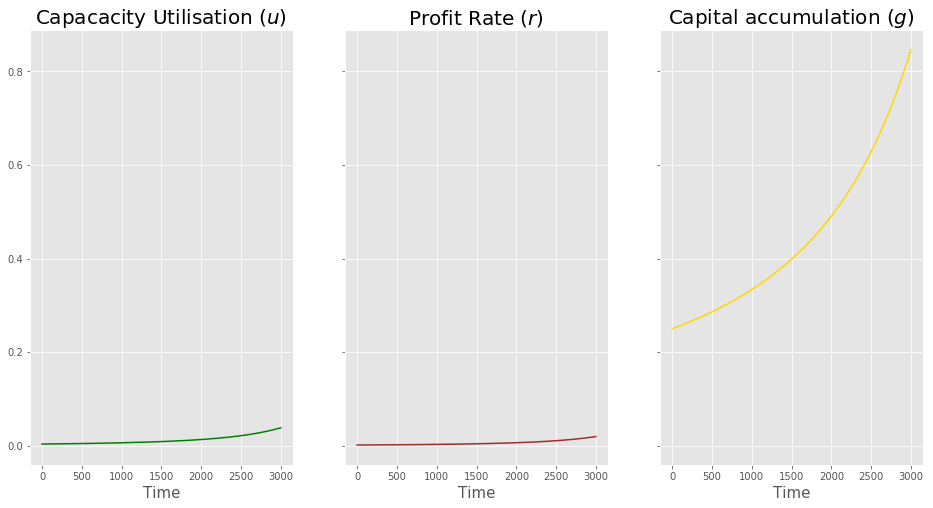

In [11]:
fig, ax = plt.subplots(ncols=3,sharey=True,figsize=(16,8))

ax[0].plot(range(T),list_u, color='green')
ax[1].plot(range(T),list_r, color='brown')
ax[2].plot(range(T),list_lamb, color='gold')
#ax[0].set_ylim([-0.0002, 0.00025])

ax[0].set_title('Capacacity Utilisation ($u$)', fontsize=20)
ax[1].set_title('Profit Rate ($r$)', fontsize=20)
ax[2].set_title('Capital accumulation ($g$)', fontsize=20)
ax[0].set_xlabel('Time', fontsize=15)
ax[1].set_xlabel('Time', fontsize=15)
ax[2].set_xlabel('Time', fontsize=15)
plt.show()

In [12]:
from mpl_toolkits.mplot3d import Axes3D

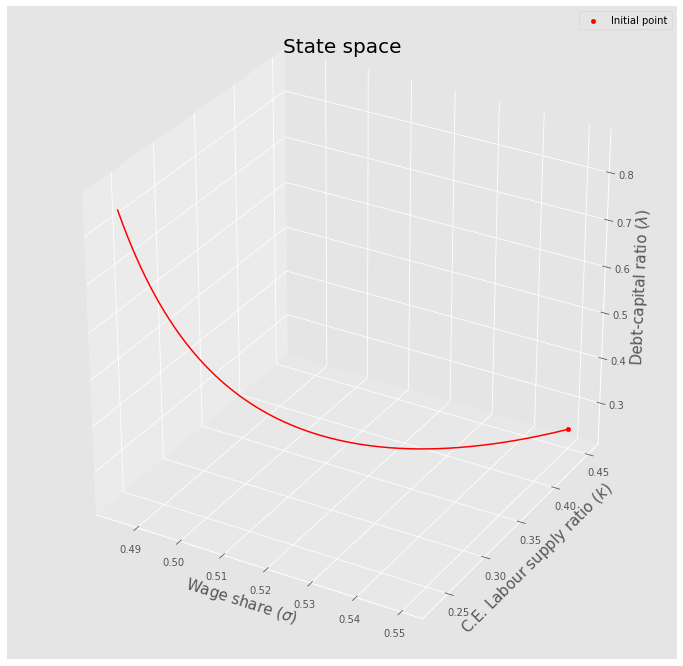

In [13]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs=list_sigma,ys=list_k,zs=list_lamb, color='red')
ax.scatter(list_sigma[0],list_k[0],list_lamb[0],marker='o',color='red',alpha=1.0,label='Initial point')

ax.set_title('State space', fontsize=20)
ax.set_xlabel('Wage share ($\sigma$)', fontsize=15)
ax.set_ylabel('C.E. Labour supply ratio ($k$)', fontsize=15)
ax.set_zlabel('Debt-capital ratio ($\lambda$)', fontsize=15)
ax.legend()

plt.show()

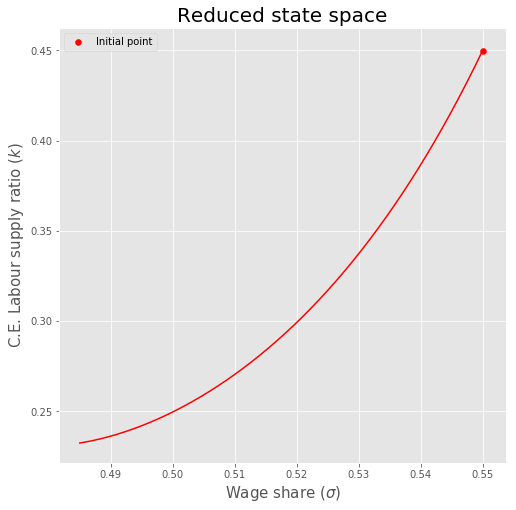

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(list_sigma,list_k, color='red')
ax.scatter(list_sigma[0],list_k[0],marker='o',color='red',alpha=1.0,label='Initial point')

ax.set_title('Reduced state space', fontsize=20)
ax.set_xlabel('Wage share ($\sigma$)', fontsize=15)
ax.set_ylabel('C.E. Labour supply ratio ($k$)', fontsize=15)

ax.legend()

plt.show()

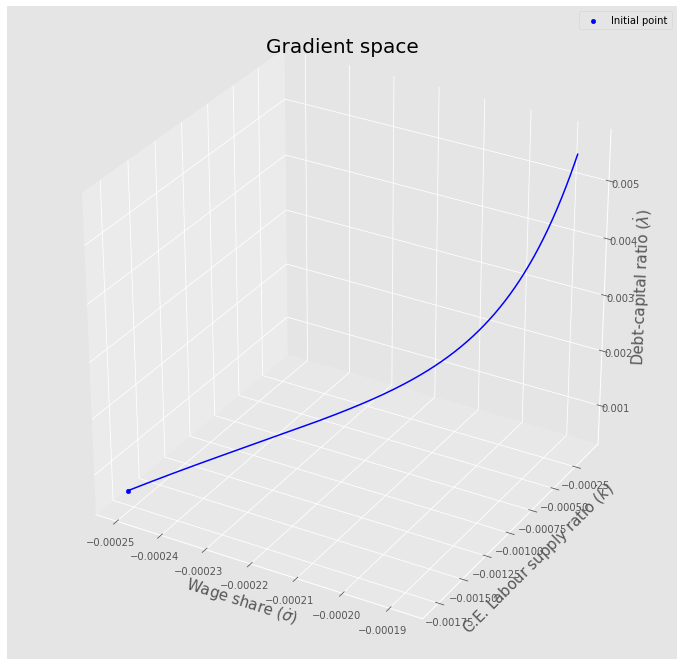

In [15]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs=list_sigma_dot,ys=list_k_dot,zs=list_lamb_dot, color='blue')
ax.scatter(list_sigma_dot[0],list_k_dot[0],list_lamb_dot[0],marker='o',color='blue',alpha=1.0,label='Initial point')

ax.set_title('Gradient space', fontsize=20)
ax.set_xlabel('Wage share ($\dot\sigma$)', fontsize=15)
ax.set_ylabel('C.E. Labour supply ratio ($\dot k$)', fontsize=15)
ax.set_zlabel('Debt-capital ratio ($\dot\lambda$)', fontsize=15)
ax.legend()

plt.show()

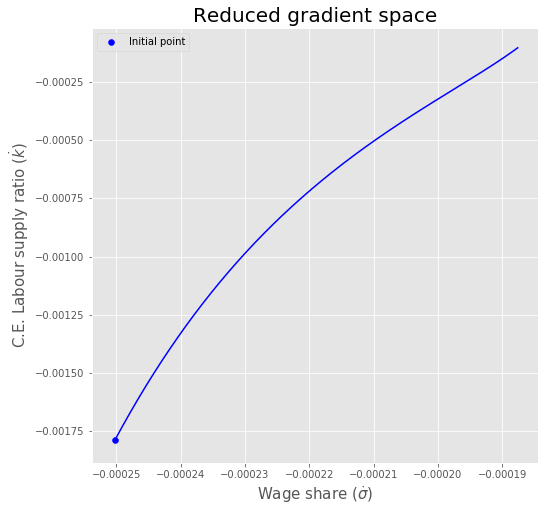

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(list_sigma_dot,list_k_dot, color='blue')
ax.scatter(list_sigma_dot[0],list_k_dot[0],marker='o',color='blue',alpha=1.0,label='Initial point')

ax.set_title('Reduced gradient space', fontsize=20)
ax.set_xlabel('Wage share ($\dot\sigma$)', fontsize=15)
ax.set_ylabel('C.E. Labour supply ratio ($\dot k$)', fontsize=15)

ax.legend()

plt.show()